# Project Goals
## Primary Goal: Build a supervised classification model to predict customer churn with high accuracy and recall.
## Secondary Goals:
### `1. Identify the most important features influencing churn.`
### `2. Provide actionable insights to the marketing team for customer retention.`
### `3. Evaluate model performance using metrics like Precision, Recall, F1-score, and ROC-AUC.`

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Import The Dataset

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Check Missing Values

In [7]:
missing_values = df.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check Target Variable

In this section we'll be check the target variables which is `Churn` to see how the churn value distribution looks like

In [8]:
churn_distribution = df['Churn'].value_counts()
churn_distribution

Churn
No     5174
Yes    1869
Name: count, dtype: int64

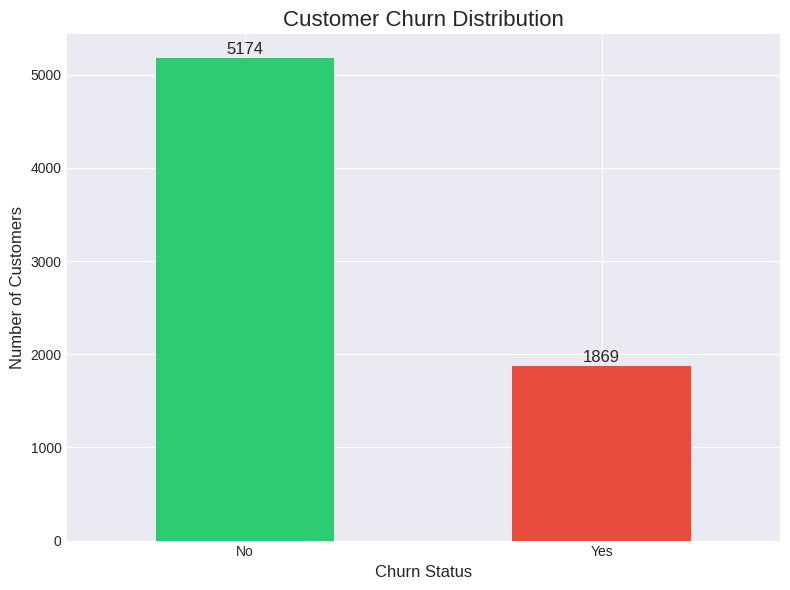

In [9]:
plt.figure(figsize=(8, 6))
churn_distribution.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(churn_distribution):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [10]:
#create new dataset copy
df_pre = df.copy()

In [11]:
# Converting TotalCharges column into numeric data types
df_pre['TotalCharges'] = pd.to_numeric(df_pre['TotalCharges'], errors='coerce')
# Check for any missing values created
print(f"Missing values in TotalCharges: {df_pre['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges: 11


In [12]:
# Fill missing Value in TotalCharges with 0 (Likely new customers)
df_pre['TotalCharges'].fillna(0, inplace=True)

### *Converting binary categorical variables to 0/1*

In [13]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df_pre[col] = df_pre[col].map({'Yes': 1, 'No': 0})

In [14]:
df_pre['gender'] = df_pre['gender'].map({'Male': 1, 'Female': 0})

### *Handle multi-category var using one-hot encoding*

In [15]:
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_pre, columns=categorical_cols, drop_first=True)

# Remove customerID as it's not useful for prediction
df_encoded = df_encoded.drop('customerID', axis=1)

print(f"Shape after encoding: {df_encoded.shape}")

Shape after encoding: (7043, 31)


## EDA (Exploratory Data Analysis)

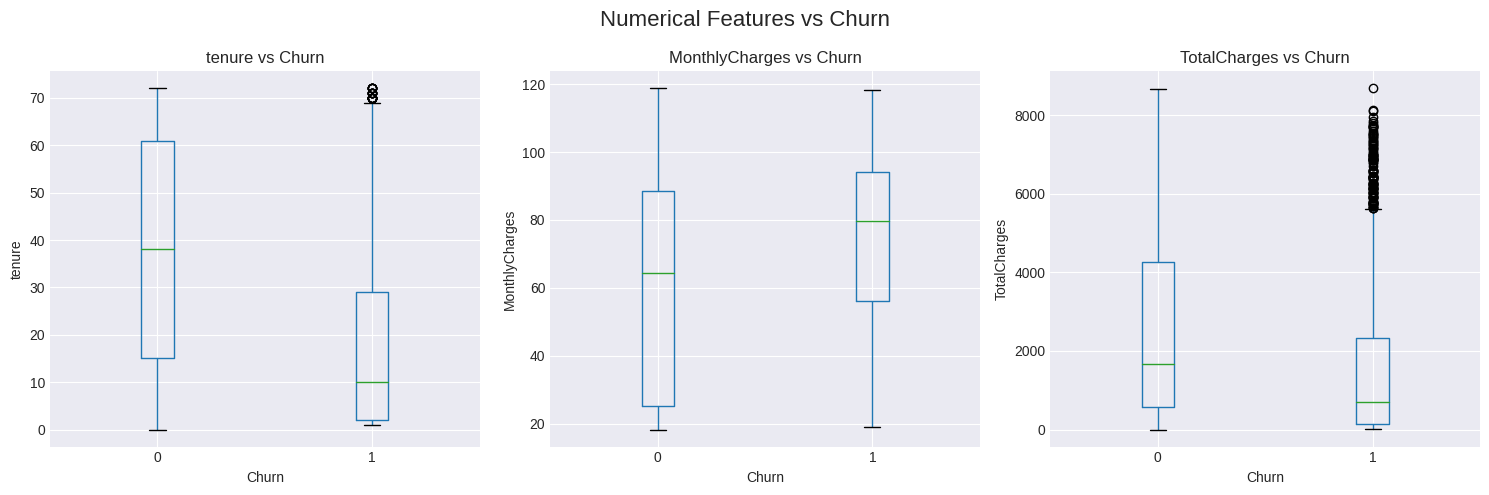

In [16]:
# Analyze numerical features vs churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(numerical_features):
    df_pre.boxplot(column=feature, by='Churn', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Churn')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feature)
plt.suptitle('Numerical Features vs Churn', fontsize=16)
plt.tight_layout()
plt.show()

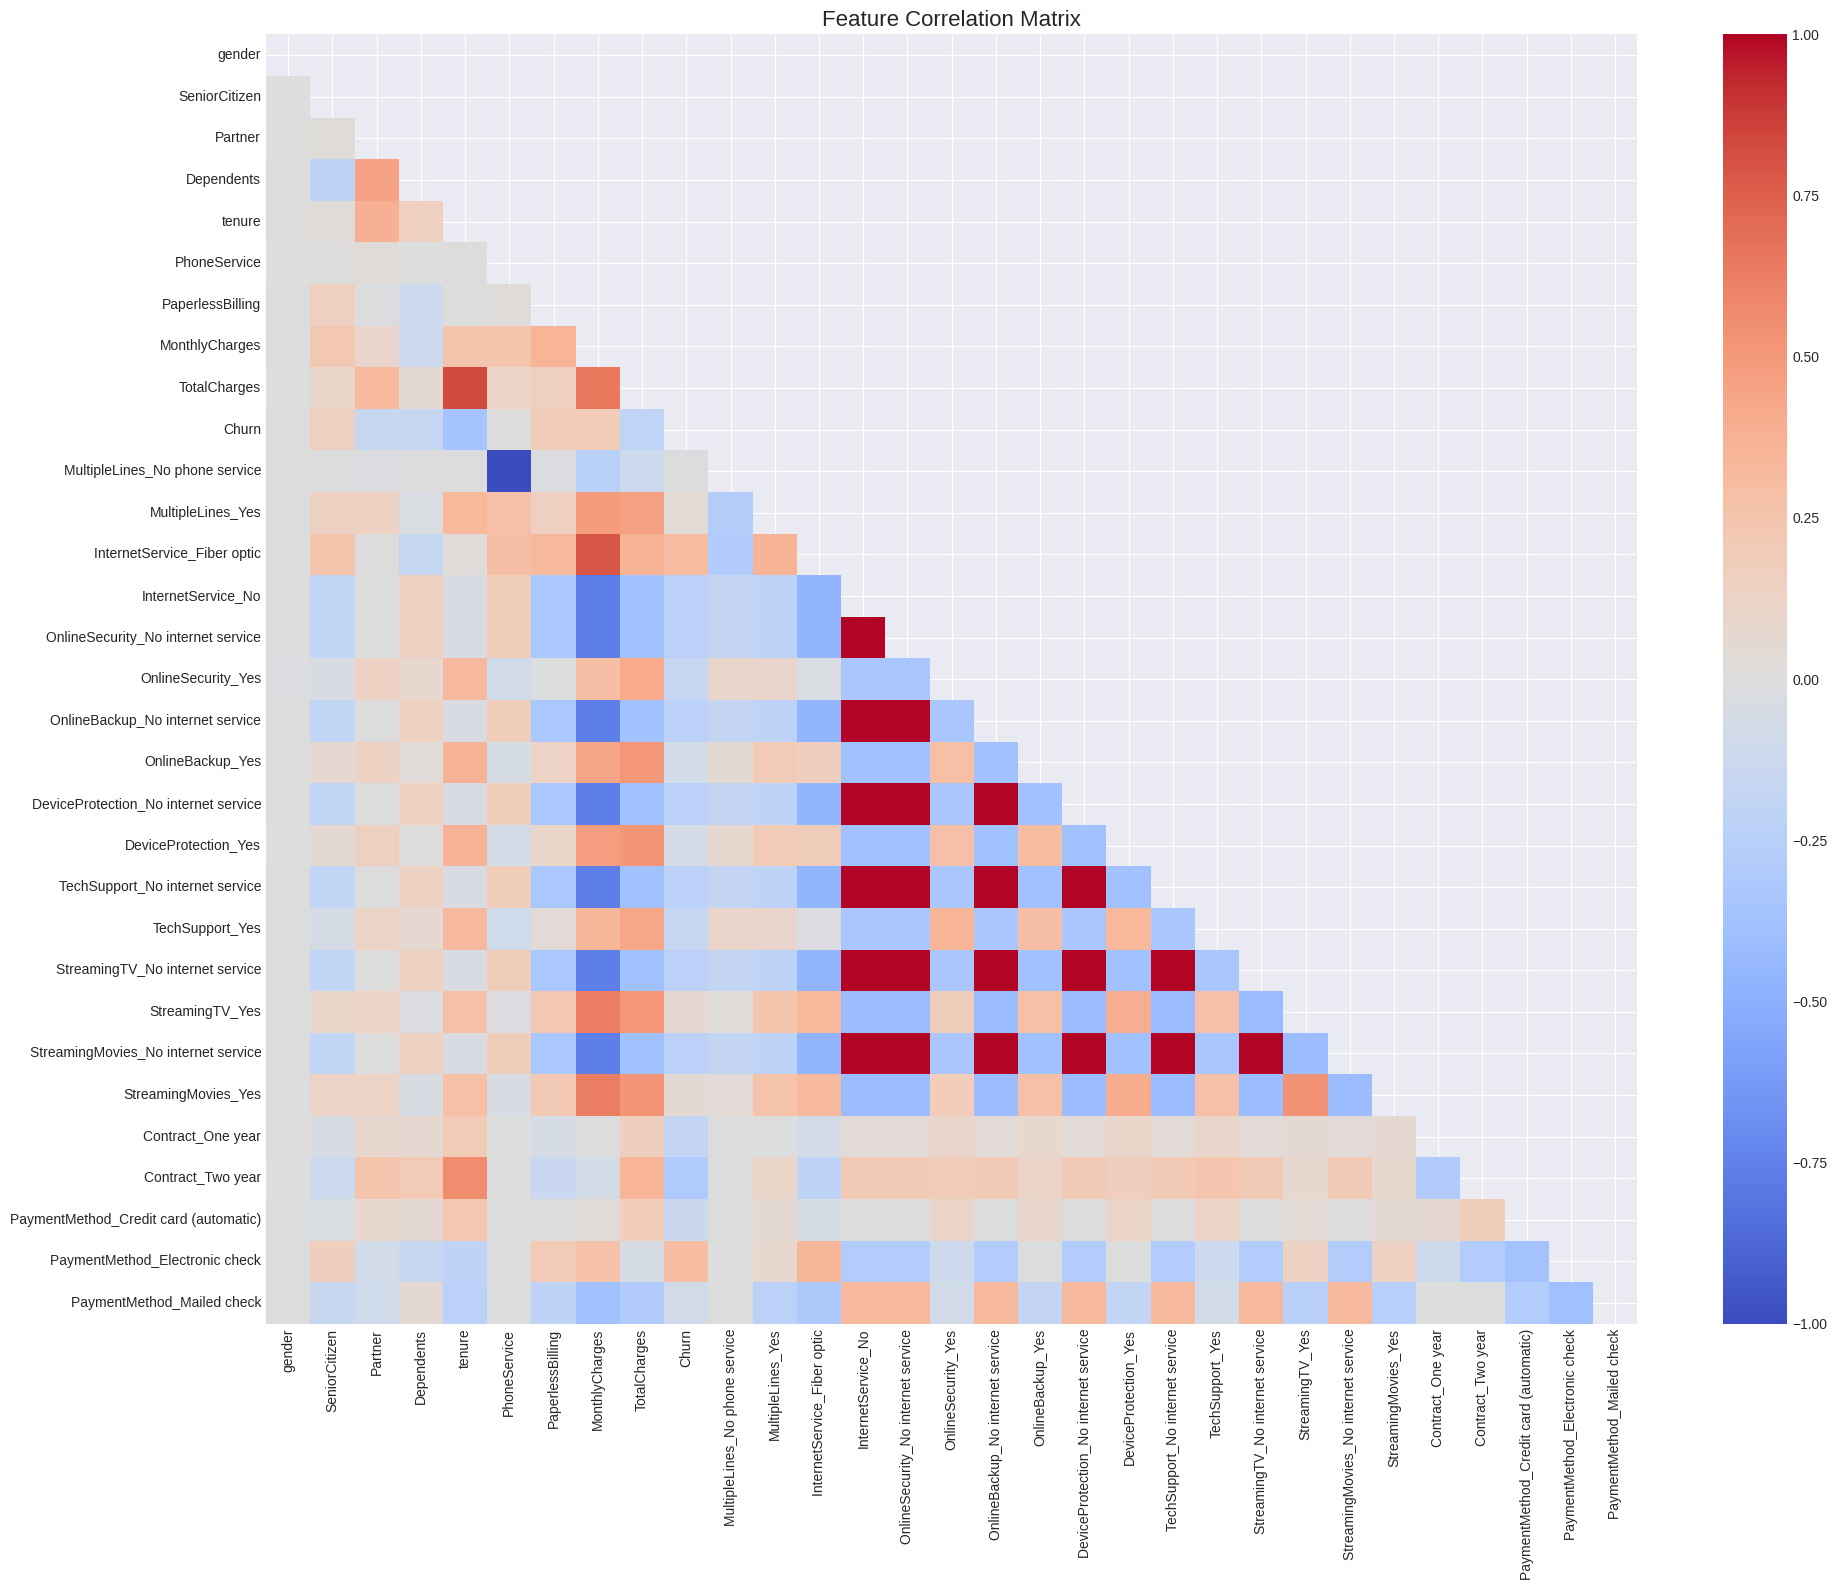

In [17]:
# Correlation analysis
plt.figure(figsize=(20, 16))
correlation_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# Show top correlations with Churn
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Churn:")
print(churn_corr.head(11)[1:])


Top 10 Features Correlated with Churn:
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService                      0.011942
gender                           -0.008612
Name: Churn, dtype: float64


# Modeling

In [19]:
# Prepare features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'XGBoost': XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
}

In [23]:
# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'model': model
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC: {roc_auc:.4f}")


Training Logistic Regression...
Accuracy: 0.8062
Precision: 0.6573
Recall: 0.5642
F1-Score: 0.6072
ROC-AUC: 0.8418

Training Decision Tree...
Accuracy: 0.7317
Precision: 0.4944
Recall: 0.4759
F1-Score: 0.4850
ROC-AUC: 0.6495

Training Random Forest...
Accuracy: 0.7842
Precision: 0.6207
Recall: 0.4813
F1-Score: 0.5422
ROC-AUC: 0.8232

Training Gradient Boosting...
Accuracy: 0.7991
Precision: 0.6564
Recall: 0.5107
F1-Score: 0.5744
ROC-AUC: 0.8423

Training XGBoost...
Accuracy: 0.7800
Precision: 0.5976
Recall: 0.5241
F1-Score: 0.5584
ROC-AUC: 0.8272


In [24]:
# Compare model performance
results_df = pd.DataFrame(results).T
results_df = results_df.drop('model', axis=1)
results_df = results_df.sort_values('f1', ascending=False)

results_df

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.806246,0.657321,0.564171,0.607194,0.841809
Gradient Boosting,0.799148,0.656357,0.510695,0.574436,0.842254
XGBoost,0.779986,0.597561,0.524064,0.558405,0.827153
Random Forest,0.784244,0.62069,0.481283,0.542169,0.823237
Decision Tree,0.731725,0.494444,0.475936,0.485014,0.649539


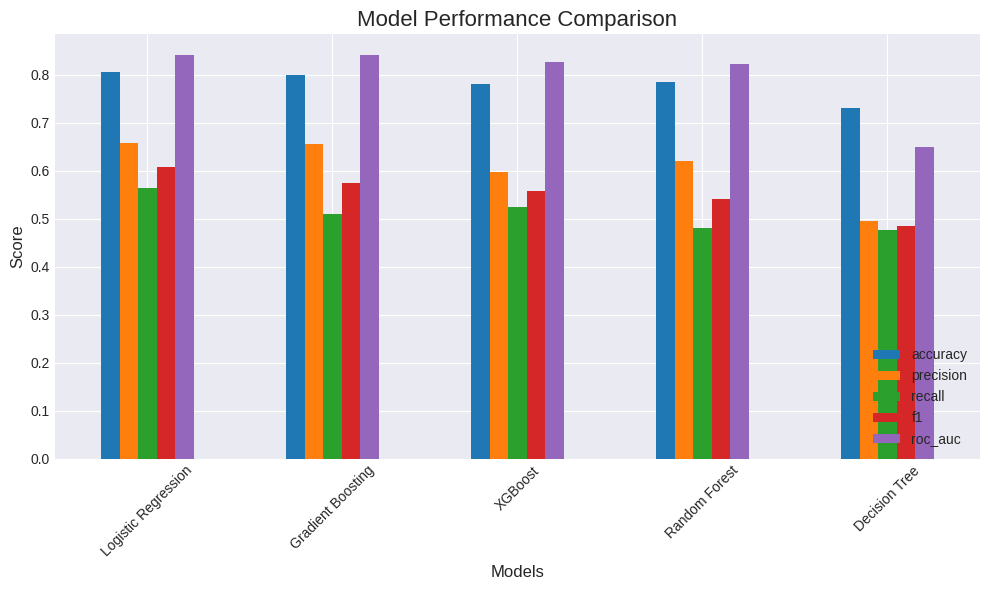

In [25]:
# Visualize model comparison
fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind='bar', ax=ax)
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [26]:
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results[best_model_name]['f1']:.4f}")


Best Model: Logistic Regression
F1-Score: 0.6072


**It Shown that `Logistic Regression` have better results for modelling churn customer**

## Evaluation

In [27]:
if best_model_name in ['Logistic Regression', 'SVM']:
    y_pred_best = best_model.predict(X_test_scaled)
    y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_best = best_model.predict(X_test)
    y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

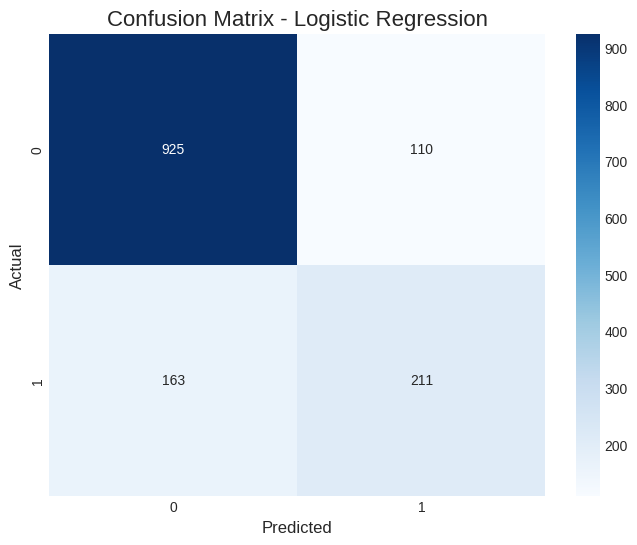

In [28]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



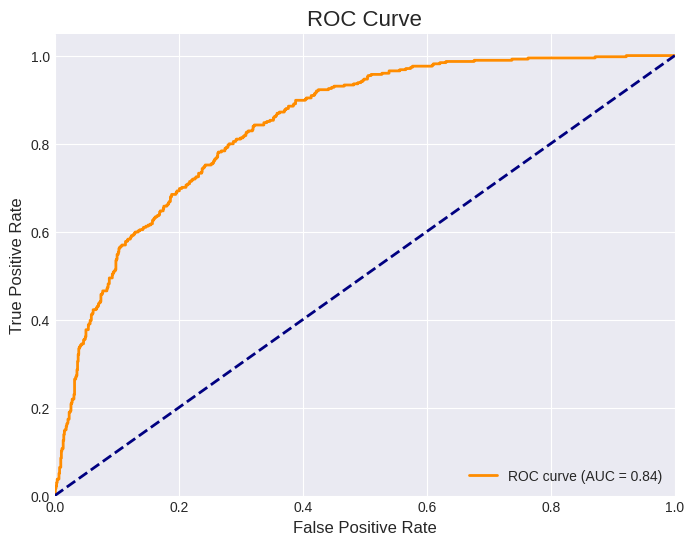

In [30]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [31]:
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*80)
print(f"\nSelected Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.2%}")
print(f"Precision: {results[best_model_name]['precision']:.2%}")
print(f"Recall: {results[best_model_name]['recall']:.2%}")
print(f"F1-Score: {results[best_model_name]['f1']:.2%}")
print(f"ROC-AUC: {results[best_model_name]['roc_auc']:.2%}")

print("\nBusiness Interpretation:")
print(f"- The model correctly identifies {results[best_model_name]['recall']:.0%} of actual churners")
print(f"- Of customers predicted to churn, {results[best_model_name]['precision']:.0%} actually will churn")
print(f"- Overall model accuracy is {results[best_model_name]['accuracy']:.0%}")

FINAL MODEL PERFORMANCE SUMMARY

Selected Model: Logistic Regression
Accuracy: 80.62%
Precision: 65.73%
Recall: 56.42%
F1-Score: 60.72%
ROC-AUC: 84.18%

Business Interpretation:
- The model correctly identifies 56% of actual churners
- Of customers predicted to churn, 66% actually will churn
- Overall model accuracy is 81%
